#GPU


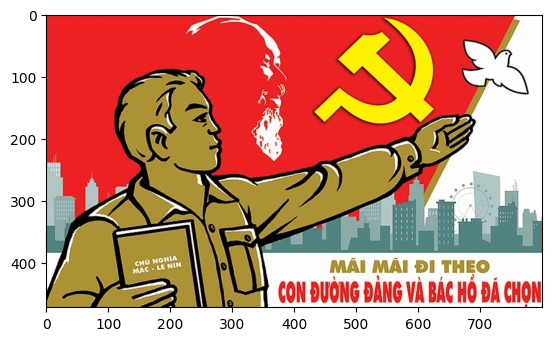

uint8


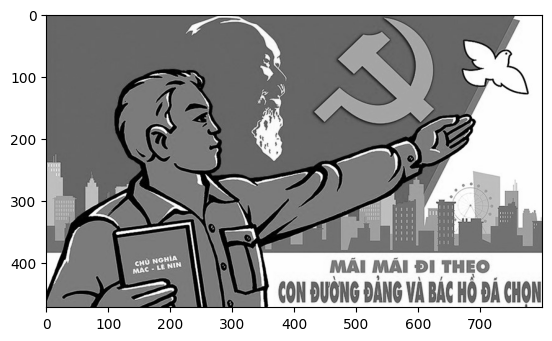

Time 0.13911175727844238s


In [18]:
import numba
from numba import cuda
import numpy as np
import matplotlib.pyplot as plt
import time

hostInp=plt.imread("images/image1.jpg")
plt.imshow(hostInp)
plt.show()
print(hostInp.dtype)
(H,W,C) = hostInp.shape

t1 = time.time()
pixelcount= H*W
hostInp=hostInp.reshape((pixelcount,3))

devOut = cuda.device_array((pixelcount, C), np.uint8)



hostOut=np.zeros((H,W,C),np.uint8)

devInp=cuda.to_device(hostInp)

@cuda.jit

def grayscale(src, dst):
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
    dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g


blockSize = 64
gridSize = pixelcount // blockSize
grayscale[gridSize, blockSize](devInp, devOut)
hostOut = devOut.copy_to_host()

t2 = time.time()
#plt.imshow(hostOut)
plt.imshow(hostOut.reshape(H,W,C))
plt.show()

print(f"Time {t2-t1}")

#CPU

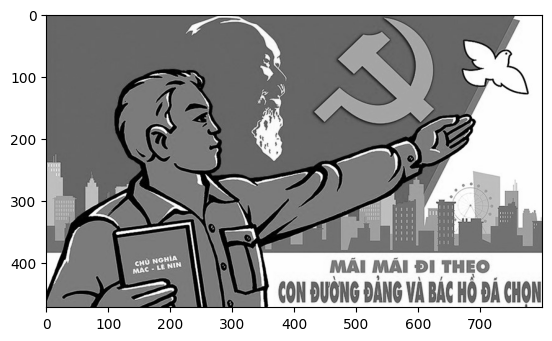

Time 1.6639020442962646


In [34]:
image=plt.imread("images/image1.jpg")
(H,W,C) = image.shape

t1 = time.time()
array = np.zeros((H,W,C),np.uint8)

for i in range(H):
  for j in range(W):
    g = np.uint8((float(image[i][j][0]) + float(image[i][j][1]) + float(image[i][j][2])) // 3)
    array[i][j]= [g]*3
    del g

t2 = time.time()
plt.imshow(array)
plt.show()

print(f"Time {t2-t1}")


In [29]:
print((H,W,C))

(472, 800, 3)


In [37]:
def grayscale_cuda(block_sizes):
    hostInp = plt.imread('/content/images/image1.jpg')
    (H, W, C) = hostInp.shape
    pixelcount = H * W
    hostInp = hostInp.reshape((pixelcount, C))


    devOut = cuda.device_array((pixelcount, C), np.uint8)
    hostOut = np.zeros((H, W, C), np.uint8)

    devInp = cuda.to_device(hostInp)

    times = []
    blocks = []

    for blockSize in block_sizes:
        gridSize = pixelcount // blockSize

        t1 = time.time()

        grayscale[gridSize, blockSize](devInp, devOut)

        hostOut = devOut.copy_to_host()

        t2 = time.time()

        times.append(t2 - t1)
        blocks.append(blockSize)

    return times, blocks

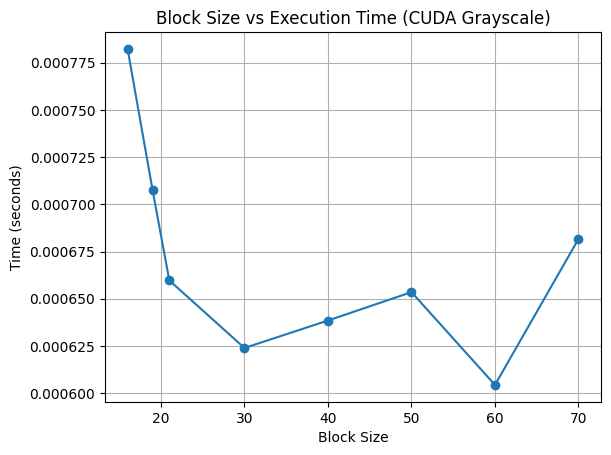

In [67]:
block_sizes = [16, 19, 21, 30, 40,50,60,70]
times , blocks = grayscale_cuda(block_sizes)

plt.plot(blocks, times, marker='o')
plt.xlabel('Block Size')
plt.ylabel('Time (seconds)')
plt.title('Block Size vs Execution Time (CUDA Grayscale)')
plt.grid(True)
plt.show()